# Data Wrangling with Python - Web Scraping Example

## Problem Statement

Say you are interested to buy a laptop that fits your budget and needs. Assume you found a webpage called <b>cosmic-pc-store.html</b>. But the webpage does not have any option to filter the prices and specifications to select based on your needs.<br>
So let’s try to scrape the data from this webpage, clean it using regex and prepare the dataset for analysis.<br>
Post preparing the data, let’s find the different laptops that fit our need by querying the data we created.<br><br>


<i>Hint:</i> Every laptop detail is seperately present in a center tag<br>
<i>Hint:</i> You can use the attrs argument in the `find_all()` function to narrow down search <a href="https://beautiful-soup-4.readthedocs.io/en/latest/#find-all">Documentation reference</a><br>
<i>Hint:</i> Don't forget to inspect the HTML code in a browser before proceeding

#### Import Libraries

In [2]:
import pandas as pd
from bs4 import BeautifulSoup

### Reading, scraping and saving the data

#### Read HTML file as Soup object

Make sure you have the html file in your working folder

In [3]:
with open('cosmic-pc-store.html', 'r') as f:
    soup = BeautifulSoup(f)

In [4]:
soup

<!DOCTYPE html>
<html lang="en">
<head><title>Used Laptops - Cosmic PC Store</title>
<meta charset="utf-8"/>
<link crossorigin="anonymous" href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css" integrity="sha384-1BmE4kWBq78iYhFldvKuhfTAU6auU8tT94WrHftjDbrCEXSU1oBoqyl2QvZ6jIW3" rel="stylesheet"/>
<script crossorigin="anonymous" integrity="sha384-ka7Sk0Gln4gmtz2MlQnikT1wXgYsOg+OMhuP+IlRH9sENBO0LRn5q+8nbTov4+1p" src="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/js/bootstrap.bundle.min.js"></script>
<!-- <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/materialize/1.0.0/css/materialize.min.css"> -->
<link href="https://fonts.googleapis.com/css?family=Open Sans" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css2?family=Roboto" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css2?family=Montserrat" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css2?family=Bebas+Neue&amp;family=Ubuntu+Mono:ital,wght@1,700&

#### Extract list of all items to process

Need to observe the code with *Inspect element* to notice that `class="iteminfo"` is present for all items

In [5]:
laptops_list = soup.find_all('center', attrs={'class':'iteminfo'})

Let's take a look at what a single laptop's data looks like. We can use the <b>prettify()</b> function make the HTML readable

In [9]:
print(laptops_list[0].prettify())

<center class="iteminfo">
 <p class="border border-3">
 </p>
 <div class="container">
  <div class="row">
   <div class="col">
    <div class="row gx-5 brandname">
     <center>
      Apple
     </center>
    </div>
    <div class="row gx-5">
     <button aria-controls="laptop0" aria-expanded="false" class="btn btn-primary" data-bs-target="#laptop0" data-bs-toggle="collapse" type="button">
      More Specifications
     </button>
    </div>
   </div>
   <div class="col">
    <div class="row gx-5 laptopname">
     MacBook Pro
    </div>
    <br/>
    <div class="row gx-5 rating">
     Rating: 4/5
    </div>
    <div class="row gx-5 age">
     Age: 6 years
    </div>
   </div>
   <div class="col-4">
    <p>
     List Price
    </p>
    <p class="listprice">
     $994
    </p>
    <p>
     Discount:
     <a class="discount">
      13%
     </a>
    </p>
    <button aria-expanded="false" class="btn btn-warning" data-bs-toggle="collapse" type="button">
     BUY NOW
    </button>
   </div>
 

#### Let's extract data from one laptop!

In [10]:
laptops_list[0].find('div', class_='brandname')

<div class="row gx-5 brandname"><center>Apple</center>
</div>

`.text` gives you the content in that tag and `.strip()` remove the leading and trailing whitespaces

In [11]:
laptops_list[0].find('div', class_='brandname').text.strip()

'Apple'

Similarly, we can extract the rest of the features of the laptop as well

In [12]:
brandname = laptops_list[0].find('div', class_='brandname').text.strip()
print(brandname)

laptopname = laptops_list[0].find('div', class_='laptopname').text.strip()
print(laptopname)

rating= laptops_list[0].find('div', class_='rating').text.strip()
print(rating)

age = laptops_list[0].find('div', class_='age').text.strip()
print(age)

price = laptops_list[0].find('p', class_='listprice').text.strip()
print(price)

disc = laptops_list[0].find('a', class_='discount').text.strip()
print(disc)

Apple
MacBook Pro
Rating: 4/5
Age: 6 years
$994
13%


#### Now let's try finding each specification

First find the collapsable button with class "collapse" inside a "div" tag. Then select each "b" attribute, get the text and strip it off whitespaces!

In [13]:
laptops_list[0].find('div', class_='collapse').select('b')[0].text.strip()

'Ultrabook'

In [14]:
laptops_list[0].find('div', class_='collapse').select('b')[1].text.strip()

'8GB'

In [15]:
laptops_list[0].find('div', class_='collapse').select('b')[2].text.strip()

'Intel Core i5 2.3GHz'

In [16]:
laptops_list[0].find('div', class_='collapse').select('b')[3].text.strip()

'IPS Panel Retina Display 2560x1600'

In [17]:
laptops_list[0].find('div', class_='collapse').select('b')[4].text.strip()

'128GB SSD'

In [18]:
laptops_list[0].find('div', class_='collapse').select('b')[5].text.strip()

'1.37kg'

#### Now we can write a loop through all laptops, find all data items and drop them into our empty dataframe

In [19]:
scraped_data = []
for laptop in laptops_list:
    
    brandname = laptop.find('div', class_='brandname').text.strip()
    laptopname = laptop.find('div', class_='laptopname').text.strip()
    rating= laptop.find('div', class_='rating').text.strip()
    age = laptop.find('div', class_='age').text.strip()
    price = laptop.find('p', class_='listprice').text.strip()
    disc = laptop.find('a', class_='discount').text.strip()
    
    # category, ram, processor, display, storage, weight = specs
    specs = [x.text for x in laptop.find('div', class_='collapse').select('b')]

    # lets append the laptop's data into the list
    scraped_data.append([brandname, laptopname, rating, age, price, disc] + specs)

In [20]:
column_names = ['brand_name','laptop_name','rating','age','price','disc','category','ram','processor',
                'display','storage','weight']

In [21]:
df = pd.DataFrame(data=scraped_data, columns=column_names)

In [22]:
df

,brand_name,laptop_name,rating,age,price,disc,category,ram,processor,display,storage,weight
0,Apple,MacBook Pro,Rating: 4/5,Age: 6 years,$994,13%,Ultrabook,8GB,Intel Core i5 2.3GHz,IPS Panel Retina Display 2560x1600,128GB SSD,1.37kg
1,Apple,Macbook Air,Rating: 5/5,Age: 8 years,$929,5%,Ultrabook,8GB,Intel Core i5 1.8GHz,1440x900,128GB Flash Storage,1.34kg
2,HP,250 G6,Rating: 4/5,Age: 8 years,$507,8%,Notebook,8GB,Intel Core i5 7200U 2.5GHz,Full HD 1920x1080,256GB SSD,1.86kg
3,Apple,MacBook Pro,Rating: 5/5,Age: 6 years,$566,12%,Ultrabook,16GB,Intel Core i7 2.7GHz,IPS Panel Retina Display 2880x1800,512GB SSD,1.83kg
4,Apple,MacBook Pro,Rating: 3.5/5,Age: 4 years,$529,5%,Ultrabook,8GB,Intel Core i5 3.1GHz,IPS Panel Retina Display 2560x1600,256GB SSD,1.37kg
...,...,...,...,...,...,...,...,...,...,...,...,...
93,Dell,Inspiron 7577,Rating: 5/5,Age: 8 years,$518,4%,Gaming,8GB,Intel Core i5 7300HQ 2.5GHz,Full HD 1920x1080,256GB SSD,2.65kg
94,Asus,Zenbook UX430UA,Rating: 3.5/5,Age: 4 years,$485,6%,Ultrabook,8GB,Intel Core i7 7500U 2.7GHz,Full HD 1920x1080,256GB SSD,1.25kg
95,Acer,Spin 5,Rating: 3.5/5,Age: 4 years,$990,6%,2 in 1 Convertible,8GB,Intel Core i5 8250U 1.6GHz,IPS Panel Full HD / Touchscreen 1920x1080,256GB SSD,1.5kg
96,Dell,Inspiron 3567,Rating: 4/5,Age: 6 years,$693,11%,Notebook,8GB,Intel Core i7 7500U 2.7GHz,Full HD 1920x1080,1TB HDD,2.2kg


#### Save the data as a CSV file

In [23]:
df.to_csv('laptops_scrape.csv', index=False)

In [24]:
df.head()

,brand_name,laptop_name,rating,age,price,disc,category,ram,processor,display,storage,weight
0,Apple,MacBook Pro,Rating: 4/5,Age: 6 years,$994,13%,Ultrabook,8GB,Intel Core i5 2.3GHz,IPS Panel Retina Display 2560x1600,128GB SSD,1.37kg
1,Apple,Macbook Air,Rating: 5/5,Age: 8 years,$929,5%,Ultrabook,8GB,Intel Core i5 1.8GHz,1440x900,128GB Flash Storage,1.34kg
2,HP,250 G6,Rating: 4/5,Age: 8 years,$507,8%,Notebook,8GB,Intel Core i5 7200U 2.5GHz,Full HD 1920x1080,256GB SSD,1.86kg
3,Apple,MacBook Pro,Rating: 5/5,Age: 6 years,$566,12%,Ultrabook,16GB,Intel Core i7 2.7GHz,IPS Panel Retina Display 2880x1800,512GB SSD,1.83kg
4,Apple,MacBook Pro,Rating: 3.5/5,Age: 4 years,$529,5%,Ultrabook,8GB,Intel Core i5 3.1GHz,IPS Panel Retina Display 2560x1600,256GB SSD,1.37kg


### Wrangling Text data using Regex

#### Let's refine the data a little more so it's easy to work with
* `Rating: 4/5` can be extracted to a numerical value **4**
* `Age: 6 years` can be extracted to a numerical value **6**
* `$994` can be extracted to a numerical value **994**
* Discount percentage can be reduced to a numerical value by filtering out `%` symbol.
* It is given that RAM is in Gigabytes. `8GB` can be reduced to **8**
* The processor column can be split into processor_brand and clock_speed
* Resolution can be extracted from the Display column
* `1.37kg` in weight can be reduced to **1.37**


In [25]:
df['rating'] = df['rating'].str.extract(r'(\d{1})')

In [26]:
df['rating']

0     4
1     5
2     4
3     5
4     3
     ..
93    5
94    3
95    3
96    4
97    3
Name: rating, Length: 98, dtype: object

In [27]:
df['age'] = df['age'].str.extract(r'(\d)')

In [28]:
df['age']

0     6
1     8
2     8
3     6
4     4
     ..
93    8
94    4
95    4
96    6
97    6
Name: age, Length: 98, dtype: object

In [29]:
df['price'] = df['price'].str.extract(r'(\d+)')

In [30]:
df['price']

0     994
1     929
2     507
3     566
4     529
     ... 
93    518
94    485
95    990
96    693
97    483
Name: price, Length: 98, dtype: object

In [31]:
df['disc'] = df['disc'].str.extract(r'(\d+)').astype('int').div(100)

In [32]:
df['disc']

0     0.13
1     0.05
2     0.08
3     0.12
4     0.05
      ... 
93    0.04
94    0.06
95    0.06
96    0.11
97    0.10
Name: disc, Length: 98, dtype: float64

In [33]:
df['ram'] = df['ram'].str.extract(r'(\d+)')

In [34]:
df['ram']

0      8
1      8
2      8
3     16
4      8
      ..
93     8
94     8
95     8
96     8
97     4
Name: ram, Length: 98, dtype: object

In [35]:
df['processor_brand'] = df['processor'].str.extract(r'(\w+)')

In [36]:
df['processor_brand'].unique()

array(['Intel', 'AMD'], dtype=object)

In [37]:
df['processor_speed'] = df['processor'].str.extract(r'(\d.?\d)GHz')

In [38]:
df['processor_speed'].unique()

array(['2.3', '1.8', '2.5', '2.7', '3.1', '0 3', '2.2', '1.6', nan, '2.8',
       '1.2', '2.9', '2.4', '44', '1.5', '1.9', '1.1', '2.0', '1.3'],
      dtype=object)

In [39]:
df['resolution'] = df['display'].str.extract(r'(\d{3,4}x\d{3,4})')

In [40]:
df['resolution'].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '1920x1200', '2256x1504'], dtype=object)

In [41]:
df = df.join(df['resolution'].str.split('x', expand=True).rename(columns={0:'res-x', 1:'res-y'}))

In [42]:
df['effective_price'] = df[['price','disc']].apply(lambda x: int(x[0])*(1-float(x[1])), axis=1)

In [43]:
df['effective_price']

0     864.78
1     882.55
2     466.44
3     498.08
4     502.55
       ...  
93    497.28
94    455.90
95    930.60
96    616.77
97    434.70
Name: effective_price, Length: 98, dtype: float64

#### Save as CSV file

In [44]:
df.to_csv('laptops_scrape_cleaned.csv', index=False)

### Data Exploration

I want to explore an used laptop which gives me the **best value for money** which also meets the following conditions:

* Not lesser than **4 years** old
* Runs on an **Intel** Processor

In [45]:
df = pd.read_csv('laptops_scrape_cleaned.csv')

In [46]:
df.head()

,brand_name,laptop_name,rating,age,price,disc,category,ram,processor,display,storage,weight,processor_brand,processor_speed,resolution,res-x,res-y,effective_price
0,Apple,MacBook Pro,4,6,994,0.13,Ultrabook,8,Intel Core i5 2.3GHz,IPS Panel Retina Display 2560x1600,128GB SSD,1.37kg,Intel,2.3,2560x1600,2560,1600,864.78
1,Apple,Macbook Air,5,8,929,0.05,Ultrabook,8,Intel Core i5 1.8GHz,1440x900,128GB Flash Storage,1.34kg,Intel,1.8,1440x900,1440,900,882.55
2,HP,250 G6,4,8,507,0.08,Notebook,8,Intel Core i5 7200U 2.5GHz,Full HD 1920x1080,256GB SSD,1.86kg,Intel,2.5,1920x1080,1920,1080,466.44
3,Apple,MacBook Pro,5,6,566,0.12,Ultrabook,16,Intel Core i7 2.7GHz,IPS Panel Retina Display 2880x1800,512GB SSD,1.83kg,Intel,2.7,2880x1800,2880,1800,498.08
4,Apple,MacBook Pro,3,4,529,0.05,Ultrabook,8,Intel Core i5 3.1GHz,IPS Panel Retina Display 2560x1600,256GB SSD,1.37kg,Intel,3.1,2560x1600,2560,1600,502.55


In [47]:
df.describe()

,rating,age,price,disc,ram,res-x,res-y,effective_price
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,4.030612,6.020408,630.755102,0.087959,7.795918,1888.285714,1086.204082,575.553776
std,0.765952,1.499000,235.949674,0.034788,3.815214,376.069307,248.811524,216.382026
min,3.000000,4.000000,251.000000,0.040000,2.000000,1366.000000,768.000000,223.550000
25%,3.000000,5.000000,435.250000,0.060000,4.000000,1920.000000,1080.000000,387.220000
50%,4.000000,6.000000,602.000000,0.080000,8.000000,1920.000000,1080.000000,569.975000
75%,5.000000,8.000000,849.000000,0.110000,8.000000,1920.000000,1080.000000,789.760000
max,5.000000,8.000000,994.000000,0.150000,16.000000,3200.000000,1800.000000,930.600000


In [48]:
import seaborn as sns

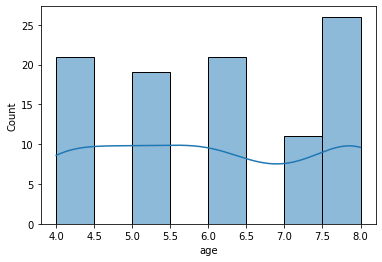

In [49]:
sns.histplot(df['age'], kde=True)

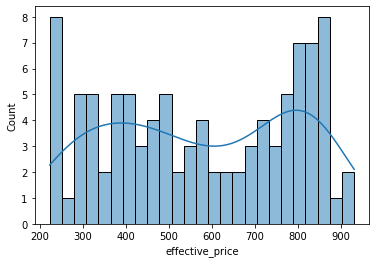

In [50]:
sns.histplot(df['effective_price'], kde=True, bins=25)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


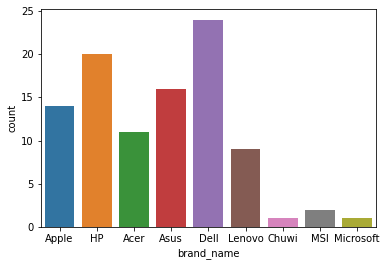

In [51]:
sns.countplot(df['brand_name'])

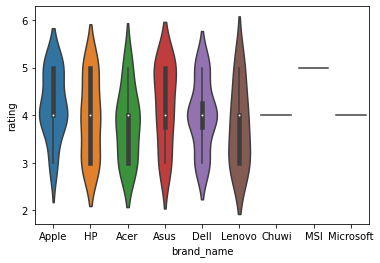

In [ ]:
sns.violinplot(x="brand_name", y="rating", data=df)

In [52]:
df.groupby('brand_name')['effective_price'].mean()

brand_name
Acer         542.650000
Apple        682.490000
Asus         599.603750
Chuwi        379.100000
Dell         588.588750
HP           518.838500
Lenovo       559.613333
MSI          480.650000
Microsoft    406.780000
Name: effective_price, dtype: float64

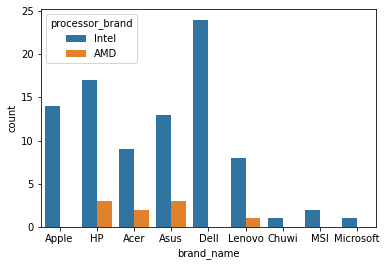

In [53]:
sns.countplot(x="brand_name", hue="processor_brand", data=df)

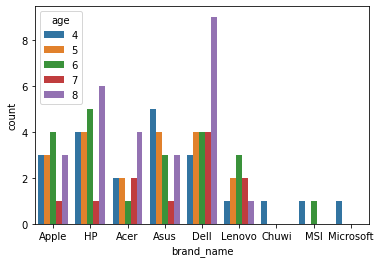

In [54]:
sns.countplot(x="brand_name", hue="age", data=df)

We can roughly conclude the following:
* Apple devices are generally the most expensive but also well rated
* Apple devices also have relatively less number of older laptops
<br>

So, **Apple** looks like the perfect brand for purchasing a new laptop

In [55]:
df.loc[(df['brand_name']=='Apple') &
       (df['ram']==16)
]

,brand_name,laptop_name,rating,age,price,disc,category,ram,processor,display,storage,weight,processor_brand,processor_speed,resolution,res-x,res-y,effective_price
3,Apple,MacBook Pro,5,6,566,0.12,Ultrabook,16,Intel Core i7 2.7GHz,IPS Panel Retina Display 2880x1800,512GB SSD,1.83kg,Intel,2.7,2880x1800,2880,1800,498.08
6,Apple,MacBook Pro,5,8,892,0.05,Ultrabook,16,Intel Core i7 2.2GHz,IPS Panel Retina Display 2880x1800,256GB Flash Storage,2.04kg,Intel,2.2,2880x1800,2880,1800,847.40
12,Apple,MacBook Pro,4,5,879,0.04,Ultrabook,16,Intel Core i7 2.8GHz,IPS Panel Retina Display 2880x1800,256GB SSD,1.83kg,Intel,2.8,2880x1800,2880,1800,843.84
17,Apple,MacBook Pro,5,7,769,0.12,Ultrabook,16,Intel Core i7 2.9GHz,IPS Panel Retina Display 2880x1800,512GB SSD,1.83kg,Intel,2.9,2880x1800,2880,1800,676.72


---------------

I can now choose the best option from the above considering other factors too!